# Visualizing Data from DataHub.io with Matplotlib and Seaborn
Notebook on visualizing data published in the DataHub.io data repository using Python's Matplotlib and Seaborn

by: Muhammad Azammuddin bin Suratem (`@azamsuratem` on GitHub) 

<a id="T"></a>
## Table of Contents
1. [Data Extraction - from DataHub.io](#C1)
<br>
2. [`missingno` - Matrix plots of Missing values](#C2)
<br>
3. [Pandas `.head()`, `.tail()`, and `.info()`](#C3)
    - 3.1 [Pandas `.head()`, `.tail()`](#C3_1)
    - 3.2 [Pandas `.info()`](#C3_2)
<br><br>
4. [Dataframes of Statistics Summary](#C4)
<br>
5. [Seaborn `pairplot` - overview of data distributions](#C5)
<br>
6. [Time series plot using Seaborn `lineplot`](#C6)
<br>
7. [Seaborn `heatmap`](#C7)
    - 7.1 [Heatmap to show patterns of the data by year/month](#C7_1)
    - 7.2 [Heatmap on correlations](#C7_2)
<br><br>
8. [Displaying outliers using Seaborn `boxplot`](#C8)
<br>
9. [Enhanced time series plots - horizontal lines of descriptive statistics](#C9)
<br>
10. [Decomposition of time series plots (for time series forecasting)](#C10)

<a id="C1"></a>
### 1. Data Extraction - from DataHub.io

The following codes are modified from the Python's Pandas scripting provided in the data repository DataHub.io:
<br>
`price_gold`: Gold Prices - Dataset | Link https://datahub.io/core/gold-prices#pandas
<br>
`price_ng`: Natural gas prices - Dataset | Link https://datahub.io/core/natural-gas#pandas
<br>
`co2_level`: CO2 PPM - Trends in Atmospheric Carbon Dioxide - Dataset | Link https://datahub.io/core/co2-ppm-daily#pandas
<br>
`temp_anom`: Global Temperature Time Series - Dataset | Link https://datahub.io/core/global-temp#pandas

In [1]:
# 1st time installation: Installing datapackage library using !pip command for Windows operating system
!pip install datapackage

In [2]:
# importing datapackage and Pandas libraries for data extraction
from datapackage import Package as Pkg
import pandas as pd

In [3]:
# defining variables for the URL (links) from DataHub.io data repository on the data
url_gold = 'https://datahub.io/core/gold-prices/datapackage.json'
url_ng = 'https://datahub.io/core/natural-gas/datapackage.json'
url_co2 = 'https://datahub.io/core/co2-ppm-daily/datapackage.json'
url_temp = 'https://datahub.io/core/global-temp/datapackage.json'

In [4]:
# to load Data Package into the storage
package_gold = Pkg(url_gold)
package_ng = Pkg(url_ng)
package_co2 = Pkg(url_co2)
package_temp = Pkg(url_temp)

In [5]:
# to load only tabular data
resources_gold = package_gold.resources
resources_ng = package_ng.resources
resources_co2 = package_co2.resources
resources_temp = package_temp.resources

# function to store the tabular data in a Pandas DataFrame
def load_data(resources):
    global data
    for resource in resources:
        if resource.tabular:
            data = pd.read_csv(resource.descriptor['path'])

In [6]:
# store the tabular data for gold prices
load_data(resources_gold)
price_gold = data
price_gold

,Date,Price
0,1950-01,34.730
1,1950-02,34.730
2,1950-03,34.730
3,1950-04,34.730
4,1950-05,34.730
...,...,...
842,2020-03,1593.764
843,2020-04,1680.030
844,2020-05,1715.697
845,2020-06,1734.032


In [7]:
# store the tabular data for natural gas prices
load_data(resources_ng)
price_ng = data
price_ng

,Month,Price
0,1997-01,3.45
1,1997-02,2.15
2,1997-03,1.89
3,1997-04,2.03
4,1997-05,2.25
...,...,...
279,2020-04,1.74
280,2020-05,1.75
281,2020-06,1.63
282,2020-07,1.77


In [8]:
# store the tabular data for atmospheric CO2 trends
load_data(resources_co2)
co2_level = data
co2_level

,date,value
0,1958-03-30,316.16
1,1958-03-31,316.40
2,1958-04-02,317.67
3,1958-04-03,317.76
4,1958-04-04,317.09
...,...,...
19414,2020-08-30,411.90
19415,2020-08-31,411.44
19416,2020-09-01,411.93
19417,2020-09-02,411.85


In [9]:
# store the tabular data for trends in temperature anomalies
load_data(resources_temp)
temp_anom = data
temp_anom

,Source,Date,Mean
0,GCAG,2016-12,0.7895
1,GISTEMP,2016-12,0.8100
2,GCAG,2016-11,0.7504
3,GISTEMP,2016-11,0.9300
4,GCAG,2016-10,0.7292
...,...,...,...
3283,GISTEMP,1880-03,-0.1800
3284,GCAG,1880-02,-0.1229
3285,GISTEMP,1880-02,-0.2100
3286,GCAG,1880-01,0.0009


In [10]:
# delete some unused variables to save storage and memory space
del data, package_gold, package_ng, package_co2, package_temp, resources_gold, resources_ng, resources_co2, resources_temp

[Back to Table of Contents](#T)

<a id="C2"></a>
### 2. `missingno` - Matrix plots of Missing values

Python can check if there are any missing values in the extracted data by using `missingno.matrix` command

In [11]:
# import missingno library for plotting the missing value matrix
import missingno as msno

Checking missing values for price_gold DataFrame


<AxesSubplot:>

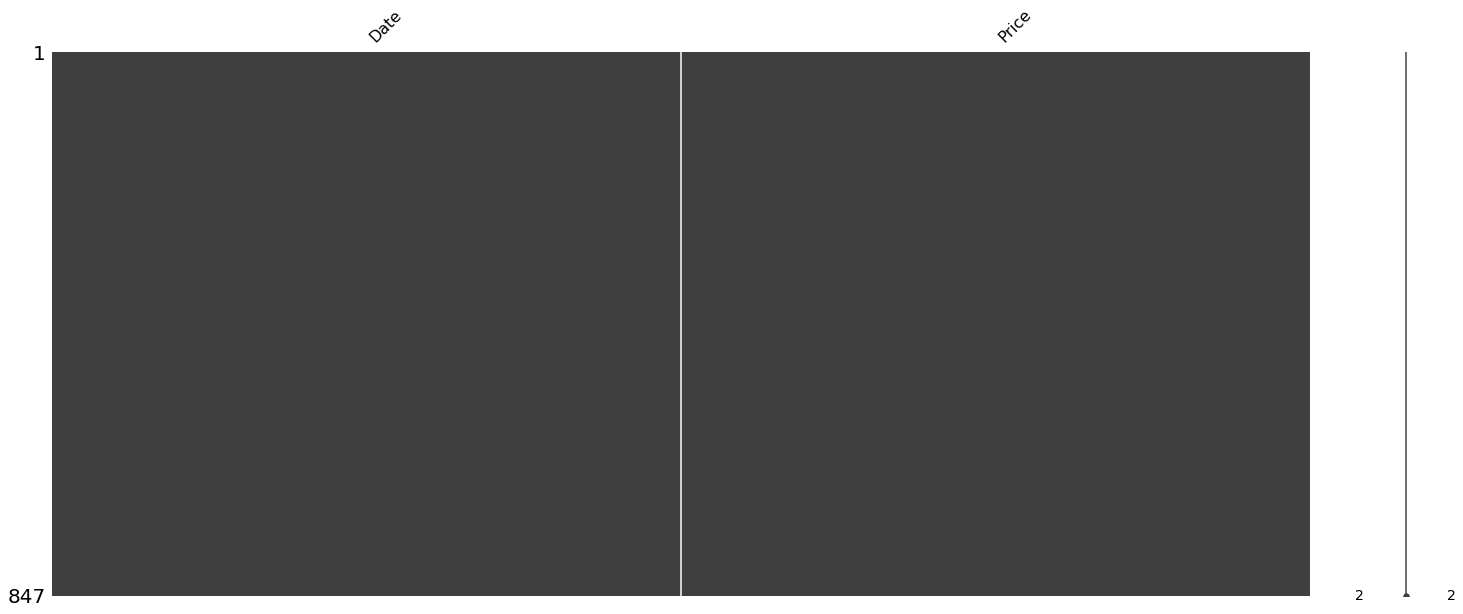

In [12]:
print("Checking missing values for price_gold DataFrame")
msno.matrix(price_gold)

Checking missing values for price_ng DataFrame


<AxesSubplot:>

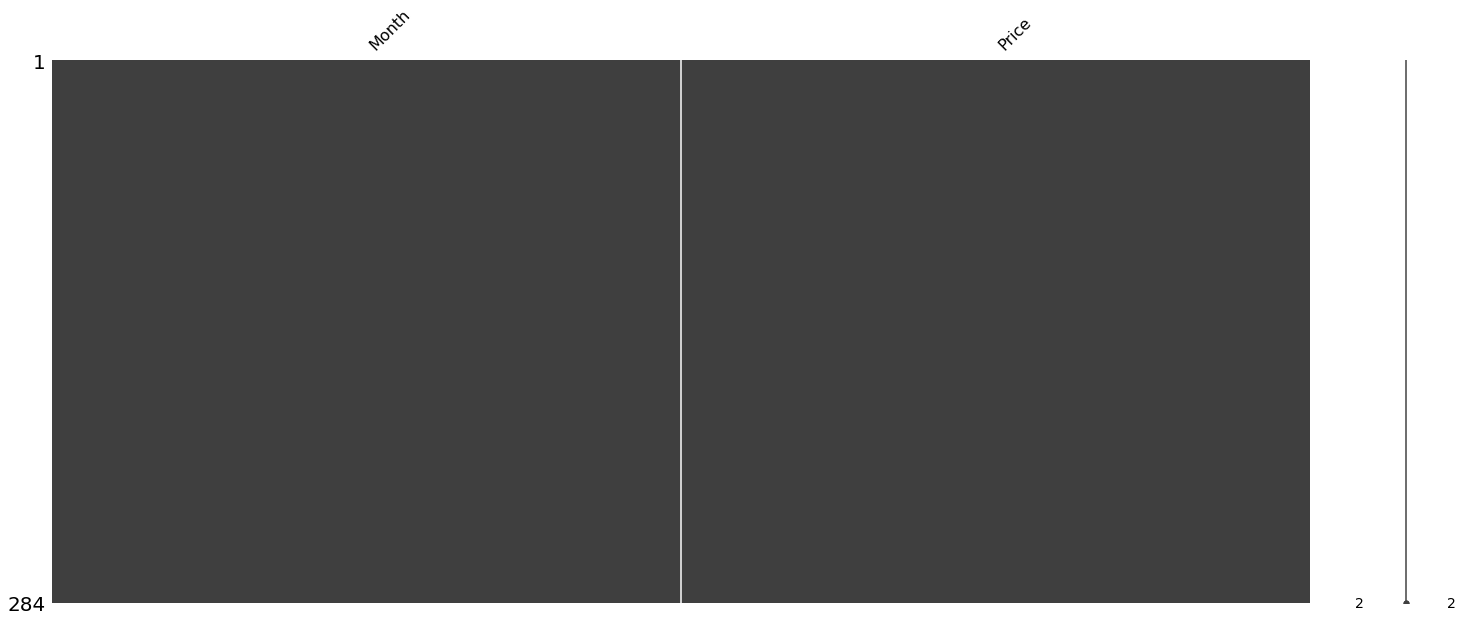

In [13]:
print("Checking missing values for price_ng DataFrame")
msno.matrix(price_ng)

Checking missing values for co2_level DataFrame


<AxesSubplot:>

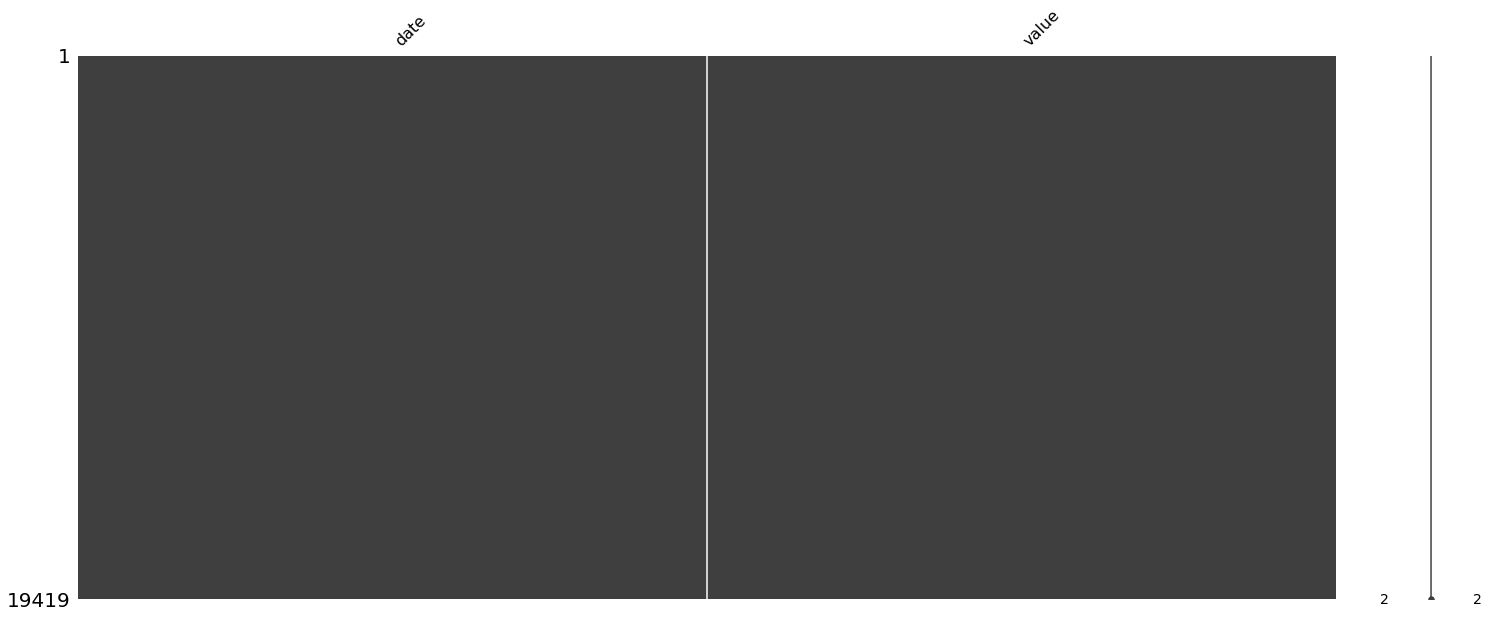

In [14]:
print("Checking missing values for co2_level DataFrame")
msno.matrix(co2_level)

Checking missing values for temp_anom DataFrame


<AxesSubplot:>

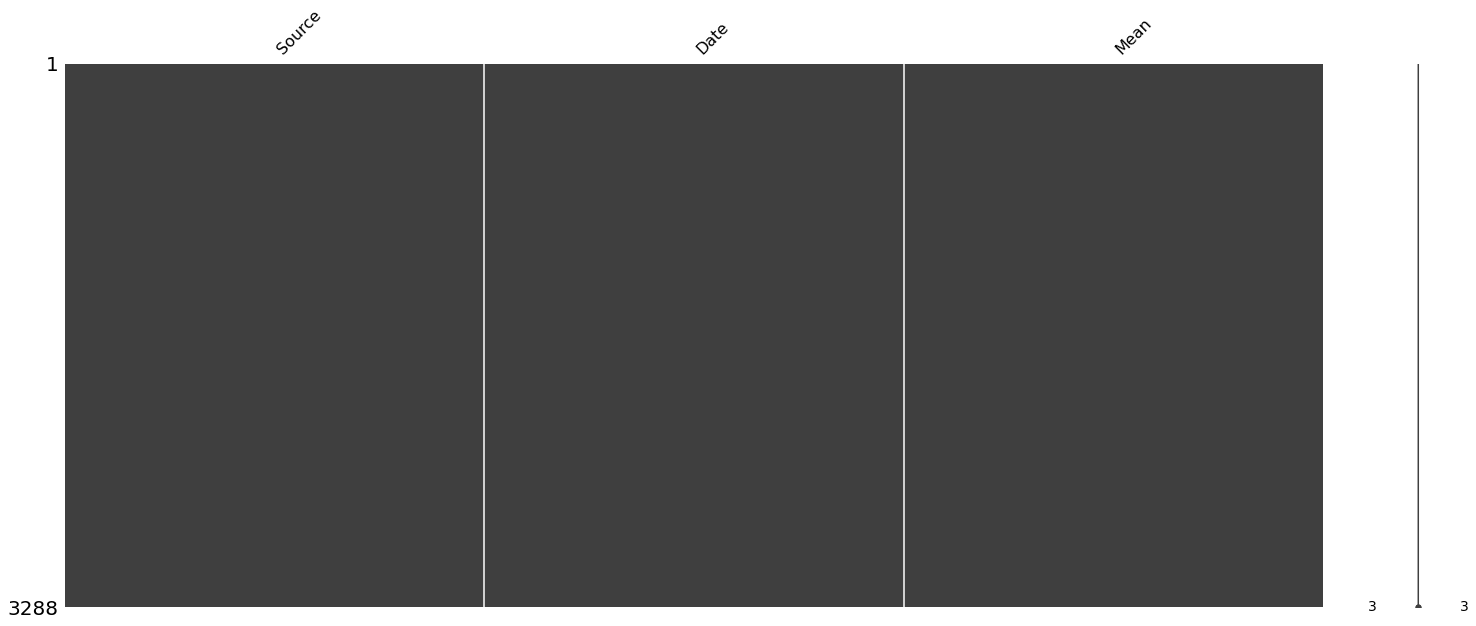

In [15]:
print("Checking missing values for temp_anom DataFrame")
msno.matrix(temp_anom)

Good. Seems like all the loaded data does not have any missing values.

[Back to Table of Contents](#T)

<a id="C3"></a>
### 3. Pandas `.head()`, `.tail()`, and `.info()`

<a id="C3_1"></a>
#### 3.1 Pandas `.head()` and `.tail()`

using Pandas:
- `.head(10)` to show the first 10 rows of the extracted data, and
- `.tail(10)` to show the last 10 rows of the extracted data

In [16]:
price_gold.head(10)

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73
5,1950-06,34.73
6,1950-07,34.73
7,1950-08,34.73
8,1950-09,34.73
9,1950-10,34.73


In [17]:
price_gold.tail(10)

,Date,Price
837,2019-10,1494.765
838,2019-11,1471.921
839,2019-12,1480.025
840,2020-01,1560.668
841,2020-02,1598.818
842,2020-03,1593.764
843,2020-04,1680.030
844,2020-05,1715.697
845,2020-06,1734.032
846,2020-07,1840.807


In [18]:
price_ng.head(10)

,Month,Price
0,1997-01,3.45
1,1997-02,2.15
2,1997-03,1.89
3,1997-04,2.03
4,1997-05,2.25
5,1997-06,2.20
6,1997-07,2.19
7,1997-08,2.49
8,1997-09,2.88
9,1997-10,3.07


In [19]:
price_ng.tail(10)

,Month,Price
274,2019-11,2.65
275,2019-12,2.22
276,2020-01,2.02
277,2020-02,1.91
278,2020-03,1.79
279,2020-04,1.74
280,2020-05,1.75
281,2020-06,1.63
282,2020-07,1.77
283,2020-08,2.30


In [20]:
co2_level.head(10)

,date,value
0,1958-03-30,316.16
1,1958-03-31,316.40
2,1958-04-02,317.67
3,1958-04-03,317.76
4,1958-04-04,317.09
5,1958-04-05,317.38
6,1958-04-06,317.80
7,1958-04-08,316.81
8,1958-04-10,316.56
9,1958-04-11,316.84


In [21]:
co2_level.tail(10)

,date,value
19409,2020-08-25,412.47
19410,2020-08-26,411.99
19411,2020-08-27,411.60
19412,2020-08-28,411.58
19413,2020-08-29,411.94
19414,2020-08-30,411.90
19415,2020-08-31,411.44
19416,2020-09-01,411.93
19417,2020-09-02,411.85
19418,2020-09-03,411.69


In [22]:
temp_anom.head(10)

,Source,Date,Mean
0,GCAG,2016-12,0.7895
1,GISTEMP,2016-12,0.8100
2,GCAG,2016-11,0.7504
3,GISTEMP,2016-11,0.9300
4,GCAG,2016-10,0.7292
5,GISTEMP,2016-10,0.8900
6,GCAG,2016-09,0.8767
7,GISTEMP,2016-09,0.8700
8,GCAG,2016-08,0.8998
9,GISTEMP,2016-08,0.9800


In [23]:
temp_anom.tail(10)

,Source,Date,Mean
3278,GCAG,1880-05,-0.0738
3279,GISTEMP,1880-05,-0.1400
3280,GCAG,1880-04,-0.0499
3281,GISTEMP,1880-04,-0.2700
3282,GCAG,1880-03,-0.1357
3283,GISTEMP,1880-03,-0.1800
3284,GCAG,1880-02,-0.1229
3285,GISTEMP,1880-02,-0.2100
3286,GCAG,1880-01,0.0009
3287,GISTEMP,1880-01,-0.3000


<a id="C3_2"></a>
#### 3.2 Pandas `.info()`
using Pandas `.info()`, an overview of the dataframe structure can be viewed, including:
- data types, `dtypes` for each variables (or a column)
- total number of data (or rows)

In [24]:
price_gold.info()
print()
price_ng.info()
print()
co2_level.info()
print()
temp_anom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    847 non-null    object 
 1   Price   847 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.4+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   284 non-null    object 
 1   Price   284 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.6+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19419 entries, 0 to 19418
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    19419 non-null  object 
 1   value   19419 non-null  float64
dtypes: float64(1), object(1)
memory usage: 303.5+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3288 entries, 0 to 3287
Data

`.info()` can also be utilized to double check our data structure after some minor manipulations e.g.
- renaming the column names using `.rename(columns={"old_name":"new_name"})`
- changing the data type of `Date` columns from string/str `object` or integers `int` into date & time `datetime` using `.to_datetime(df["Date"])`

In [25]:
price_gold = price_gold.rename(columns={"Price":"Price_Gold"})
price_ng = price_ng.rename(columns={"Month":"Date","Price":"Price_NaturalGas"})
co2_level = co2_level.rename(columns={"date":"Date","value":"CO2_Level"})
temp_anom = temp_anom.rename(columns={"Mean":"Mean_TempAnomalies"})

price_gold.info()
print()
price_ng.info()
print()
co2_level.info()
print()
temp_anom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        847 non-null    object 
 1   Price_Gold  847 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.4+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              284 non-null    object 
 1   Price_NaturalGas  284 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.6+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19419 entries, 0 to 19418
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       19419 non-null  object 
 1   CO2_Level  19419 non-null  float64
dtypes: float64(1), object(1)
memory usage: 303.5+ KB

<class 'pa

In [26]:
price_gold["Date"] = pd.to_datetime(price_gold["Date"])
price_ng["Date"] = pd.to_datetime(price_ng["Date"])
co2_level["Date"] = pd.to_datetime(co2_level["Date"])
temp_anom["Date"] = pd.to_datetime(temp_anom["Date"])

price_gold.info()
print()
price_ng.info()
print()
co2_level.info()
print()
temp_anom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        847 non-null    datetime64[ns]
 1   Price_Gold  847 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.4 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              284 non-null    datetime64[ns]
 1   Price_NaturalGas  284 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.6 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19419 entries, 0 to 19418
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       19419 non-null  datetime64[ns]
 1   CO2_Level

[Back to Table of Contents](#T)

<a id="C4"></a>
### 4. Dataframes of Statistics Summary
Pandas are also useful to show statistics summary using the command `.describe()`

In [27]:
# importing NumPy and statsmodels libraries for statistics summary
import numpy as np
from statsmodels.stats.descriptivestats import describe

In [28]:
price_gold.describe()

,Price_Gold
count,847.000000
mean,416.556906
std,453.665313
min,34.490000
25%,35.190000
50%,319.622000
75%,447.029000
max,1840.807000


In [29]:
price_ng.describe()

,Price_NaturalGas
count,284.000000
mean,4.207782
std,2.183396
min,1.630000
25%,2.660000
50%,3.560000
75%,5.327500
max,13.420000


In [30]:
co2_level.describe()

,CO2_Level
count,19419.000000
mean,356.781336
std,27.753242
min,312.330000
25%,332.310000
50%,354.630000
75%,378.570000
max,418.320000


In [31]:
temp_anom.describe(datetime_is_numeric=True,include=["object","float64","datetime64"])

,Source,Date,Mean_TempAnomalies
count,3288,3288,3288.000000
unique,2,NaN,NaN
top,GCAG,NaN,NaN
freq,1644,NaN,NaN
mean,NaN,1948-06-16 05:34:35.912408832,0.036588
min,NaN,1880-01-01 00:00:00,-0.780000
25%,NaN,1914-03-24 06:00:00,-0.208150
50%,NaN,1948-06-16 00:00:00,-0.036600
75%,NaN,1982-09-08 12:00:00,0.240000
max,NaN,2016-12-01 00:00:00,1.350000


Alternatively, we can use the imported `statsmodels.stats.descriptivestats` statistics function `describe` before to show a detailed statistics summary

In [32]:
describe(price_gold)

,Price_Gold
nobs,8.470000e+02
missing,0.000000e+00
mean,4.165569e+02
std_err,5.356143e-01
upper_ci,4.176067e+02
lower_ci,4.155071e+02
std,4.536653e+02
iqr,4.118390e+02
iqr_normal,3.052967e+02
mad,3.364296e+02


In [33]:
describe(price_ng)

,Price_NaturalGas
nobs,2.840000e+02
missing,0.000000e+00
mean,4.207782e+00
std_err,7.688013e-03
upper_ci,4.222850e+00
lower_ci,4.192713e+00
std,2.183396e+00
iqr,2.667500e+00
iqr_normal,1.977421e+00
mad,1.675654e+00


In [34]:
describe(co2_level)

,CO2_Level
nobs,1.941900e+04
missing,0.000000e+00
mean,3.567813e+02
std_err,1.429180e-03
upper_ci,3.567841e+02
lower_ci,3.567785e+02
std,2.775324e+01
iqr,4.626000e+01
iqr_normal,3.429259e+01
mad,2.356392e+01


In [35]:
describe(temp_anom)

,Mean_TempAnomalies
nobs,3.288000e+03
missing,0.000000e+00
mean,3.658847e-02
std_err,1.019632e-04
upper_ci,3.678832e-02
lower_ci,3.638863e-02
std,3.352550e-01
iqr,4.481500e-01
iqr_normal,3.322141e-01
mad,2.697613e-01


Statistics summary can also be categorized using the Pandas command `.groupby()` according to the categorical variables, if any of them exist in the data. For time series data, statistics summary can be categorized based on `year` or `month`.

In [36]:
price_gold.groupby(price_gold["Date"].dt.month).describe().transpose()

Date                       1            2            3            4   \
Price_Gold count    71.000000    71.000000    71.000000    71.000000   
           mean    416.488070   421.910380   418.951521   419.142775   
           std     453.792958   463.141544   460.602042   460.477524   
           min      34.490000    34.490000    34.680000    34.730000   
           25%      35.180000    35.170000    35.160000    35.396500   
           50%     302.852000   300.855000   303.205000   324.883000   
           75%     479.798000   467.806000   438.923000   445.611500   
           max    1671.886000  1743.095000  1675.057000  1680.030000   

Date                       5            6            7            8   \
Price_Gold count    71.000000    71.000000    71.000000    70.000000   
           mean    419.387732   419.922352   422.299592   406.869329   
           std     458.753975   460.502365   466.325694   449.377250   
           min      34.730000    34.530000    34.570000    34.580000   
           25%      35.569000    35.313500    35.259500    35.236750   
           50%     316.395000   316.298000   317.202000   317.021500   
           75%     456.485000   450.469500   431.098500   427.349250   
           max    1715.697000  1734.032000  1840.807000  1759.500000   

Date                       9            10           11           12  
Price_Gold count    70.000000    70.000000    70.000000    70.000000  
           mean    413.599129   414.009971   413.008357   412.776457  
           std     457.383396   451.943669   451.364930   444.932209  
           min      34.510000    34.630000    34.720000    34.660000  
           25%      35.464000    36.223250    36.228000    35.277500  
           50%     323.190000   325.478000   322.401500   320.803500  
           75%     442.367250   434.225750   434.285750   458.943500  
           max    1780.648000  1746.348000  1735.977000  1687.342000

In [37]:
price_ng.groupby(price_ng["Date"].dt.month).describe().transpose()

Date                           1          2          3          4          5   \
Price_NaturalGas count  24.000000  24.000000  24.000000  24.000000  24.000000   
                 mean    4.378750   4.199583   4.026250   4.112917   4.172500   
                 std     2.090871   2.190183   2.062149   2.168693   2.215868   
                 min     1.850000   1.770000   1.730000   1.740000   1.750000   
                 25%     2.607500   2.462500   2.577500   2.565000   2.587500   
                 50%     3.660000   3.100000   3.420000   3.465000   3.710000   
                 75%     5.907500   5.707500   5.270000   5.207500   4.887500   
                 max     8.690000   8.540000   9.410000  10.180000  11.270000   

Date                           6          7          8          9          10  \
Price_NaturalGas count  24.000000  24.000000  24.000000  23.000000  23.000000   
                 mean    4.284583   4.062083   4.035417   4.077391   4.289130   
                 std     2.430965   2.126982   1.985278   2.148590   2.439508   
                 min     1.630000   1.770000   1.850000   2.020000   1.910000   
                 25%     2.557500   2.827500   2.815000   2.865000   2.930000   
                 50%     3.760000   3.245000   3.115000   3.550000   3.570000   
                 75%     5.055000   4.730000   4.570000   4.760000   4.825000   
                 max    12.690000  11.090000   9.530000  11.750000  13.420000   

Date                           11         12  
Price_NaturalGas count  23.000000  23.000000  
                 mean    4.253478   4.618261  
                 std     2.061506   2.655633  
                 min     2.090000   1.720000  
                 25%     2.830000   2.590000  
                 50%     3.660000   4.040000  
                 75%     4.995000   5.975000  
                 max    10.300000  13.050000

In [38]:
co2_level.groupby(co2_level["Date"].dt.month).describe().transpose()

Date                      1            2            3            4   \
CO2_Level count  1729.000000  1519.000000  1667.000000  1617.000000   
          mean    355.746617   357.666781   357.403353   358.366147   
          std      27.659362    27.465087    27.427355    28.074558   
          min     315.020000   316.200000   316.160000   316.520000   
          25%     331.350000   333.235000   332.605000   333.020000   
          50%     354.020000   355.750000   355.660000   356.530000   
          75%     377.710000   379.100000   379.015000   380.660000   
          max     415.850000   416.080000   415.890000   417.850000   

Date                      5            6            7            8   \
CO2_Level count  1648.000000  1603.000000  1580.000000  1517.000000   
          mean    360.233617   359.381659   357.047544   356.596210   
          std      27.613459    27.642405    27.547077    27.575863   
          min     316.400000   317.490000   314.550000   313.690000   
          25%     335.910000   334.065000   332.415000   331.020000   
          50%     358.765000   357.970000   355.010000   354.600000   
          75%     381.632500   381.625000   377.267500   378.700000   
          max     418.120000   418.320000   415.560000   413.650000   

Date                      9            10           11           12  
CO2_Level count  1497.000000  1638.000000  1666.000000  1738.000000  
          mean    354.751730   354.004585   354.621357   355.649125  
          std      27.059167    27.837859    27.894062    28.439938  
          min     312.700000   312.330000   313.070000   313.860000  
          25%     331.470000   328.580000   329.310000   330.312500  
          50%     352.070000   352.050000   353.250000   353.745000  
          75%     376.260000   374.932500   376.780000   377.502500  
          max     411.930000   409.640000   411.130000   413.200000

In [39]:
temp_anom.groupby(temp_anom["Date"].dt.month).describe().transpose()

Date                              1           2           3           4   \
Mean_TempAnomalies count  274.000000  274.000000  274.000000  274.000000   
                   mean     0.021871    0.029409    0.045972    0.034341   
                   std      0.364676    0.369316    0.365219    0.345140   
                   min     -0.700000   -0.618700   -0.651500   -0.590000   
                   25%     -0.254425   -0.222250   -0.221350   -0.236675   
                   50%     -0.038850   -0.053500   -0.027150   -0.045950   
                   75%      0.278650    0.294700    0.285500    0.267825   
                   max      1.170000    1.350000    1.300000    1.090000   

Date                              5           6           7           8   \
Mean_TempAnomalies count  274.000000  274.000000  274.000000  274.000000   
                   mean     0.031106    0.022287    0.037955    0.039577   
                   std      0.328315    0.323554    0.304849    0.314435   
                   min     -0.540000   -0.520000   -0.480000   -0.510000   
                   25%     -0.219150   -0.220000   -0.187750   -0.190000   
                   50%     -0.040000   -0.050000   -0.034800   -0.030000   
                   75%      0.260000    0.216175    0.174375    0.194275   
                   max      0.930000    0.900600    0.868700    0.980000   

Date                              9           10          11          12  
Mean_TempAnomalies count  274.000000  274.000000  274.000000  274.000000  
                   mean     0.050192    0.052566    0.043543    0.030244  
                   std      0.309386    0.318608    0.329047    0.347086  
                   min     -0.505600   -0.550000   -0.560000   -0.780000  
                   25%     -0.177450   -0.181225   -0.180000   -0.218950  
                   50%     -0.022350   -0.010000   -0.020000   -0.043500  
                   75%      0.196675    0.210125    0.198875    0.273600  
                   max      0.926000    1.060000    1.040000    1.121900

In [40]:
temp_anom.groupby(temp_anom["Source"]).describe().transpose()

Source                           GCAG      GISTEMP
Mean_TempAnomalies count  1644.000000  1644.000000
                   mean      0.048797     0.024380
                   std       0.326230     0.343709
                   min      -0.679600    -0.780000
                   25%      -0.190625    -0.230000
                   50%      -0.021650    -0.050000
                   75%       0.252150     0.230000
                   max       1.224500     1.350000

<a id="C5"></a>
### 5. Seaborn `pairplot` - overview of data distributions

In [41]:
# importing Matplotlib and Seaborn libraries for plots
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

import seaborn as sns

In [42]:
# combine all the extracted data into a data frame using Pandas pd.merge with inner joining
combined_df = pd.merge(price_gold, price_ng, how='inner', on="Date")
combined_df = pd.merge(combined_df, co2_level, how='inner', on="Date")
combined_df = pd.merge(combined_df, temp_anom, how="inner", on="Date")
combined_df

,Date,Price_Gold,Price_NaturalGas,CO2_Level,Source,Mean_TempAnomalies
0,1997-01-01,355.025,3.45,362.68,GCAG,0.3746
1,1997-01-01,355.025,3.45,362.68,GISTEMP,0.3300
2,1997-02-01,346.400,2.15,363.49,GCAG,0.4288
3,1997-02-01,346.400,2.15,363.49,GISTEMP,0.3700
4,1997-03-01,352.311,1.89,363.77,GCAG,0.4617
...,...,...,...,...,...,...
415,2016-08-01,1340.861,2.82,403.29,GISTEMP,0.9800
416,2016-10-01,1268.929,2.98,400.64,GCAG,0.7292
417,2016-10-01,1268.929,2.98,400.64,GISTEMP,0.8900
418,2016-11-01,1240.293,2.55,402.18,GCAG,0.7504


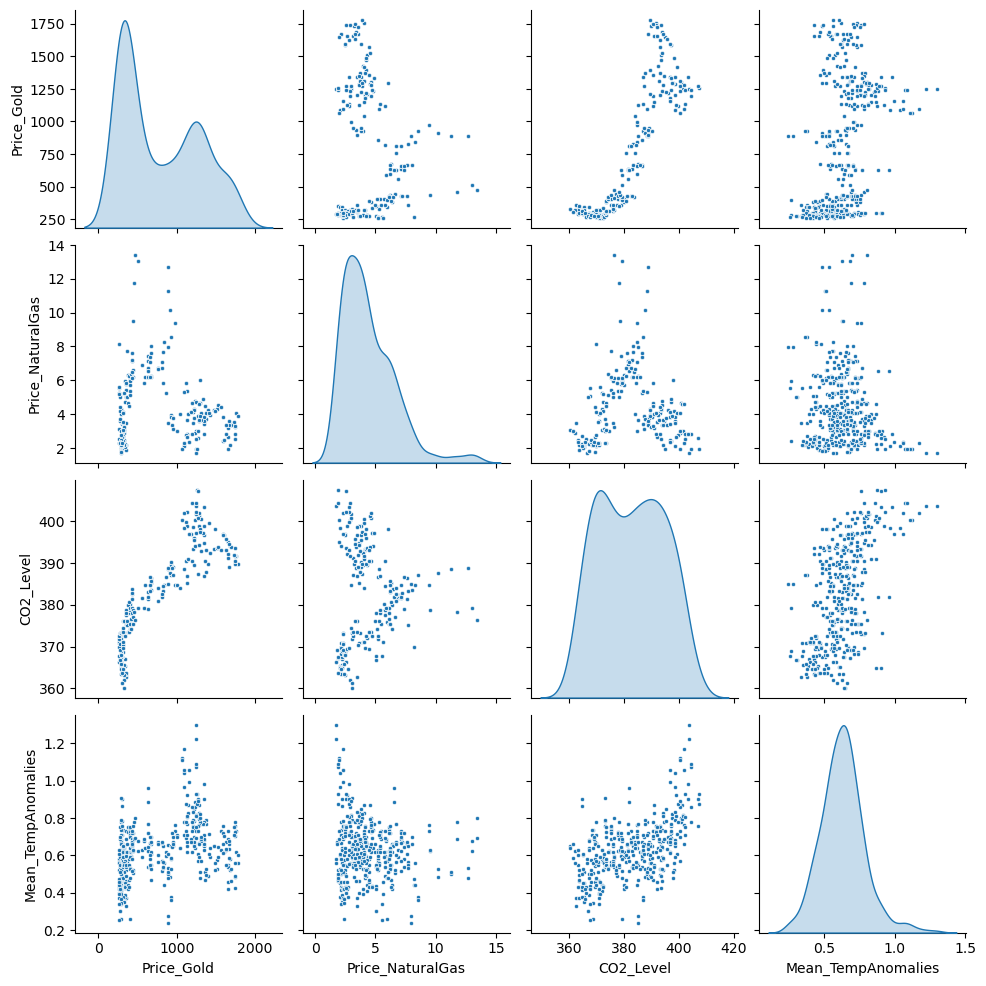

In [43]:
sns.pairplot(combined_df, vars=["Price_Gold","Price_NaturalGas","CO2_Level","Mean_TempAnomalies"], diag_kind="kde", markers=".")
plt.show()

Seaborn `pairplot`, as shown above is useful to show distributions and scatters of numerical variables when their data are plotted against each other

[Back to Table of Contents](#T)

<a id="C6"></a>
### 6. Time Series Plot using Seaborn `lineplot`
Seaborn `lineplot` can be used to show the trends of the data progressing over the time period of the data recorded

In [44]:
# defining a function for plotting time series using Seaborn lineplot
def timeseries_plot(col):
    if col == "Price_Gold":
        plt.figure(figsize=(12,8))
        sns.lineplot(x=price_gold["Date"], y=price_gold["Price_Gold"], linewidth=1, color="gold", ci=None)
        plt.title("Time series plot for gold prices")
        plt.xlabel("Year")
        plt.ylabel("Price (US$/oz)")    
        
    elif col == "Price_NaturalGas":
        plt.figure(figsize=(12,8))
        sns.lineplot(x=price_ng["Date"], y=price_ng["Price_NaturalGas"], linewidth=1, color="brown", ci=None)
        plt.title("Time series plot for natural gas prices")
        plt.xlabel("Year")
        plt.ylabel("Price (US$/MMBtu)")
        
    elif col == "CO2_Level":
        plt.figure(figsize=(12,8))
        sns.lineplot(x=co2_level["Date"], y=co2_level["CO2_Level"], linewidth=1, color="darkgrey", ci=None)
        plt.title("Time series plot for atmospheric CO\N{SUBSCRIPT TWO} Level")
        plt.xlabel("Year")
        plt.ylabel("CO\N{SUBSCRIPT TWO} Level (PPM)")
        
    elif col == "Mean_TempAnomalies":
        plt.figure(figsize=(12,8))
        sns.lineplot(x=temp_anom["Date"], y=temp_anom["Mean_TempAnomalies"], hue=temp_anom["Source"], linewidth=1, ci=None)
        plt.title("Time series plot for temperature anomalies")
        plt.xlabel("Year")
        plt.ylabel("Mean, Temp. Anomalies (\N{DEGREE SIGN}C)")
        
    else:
        return("WRONG INPUT!!!")

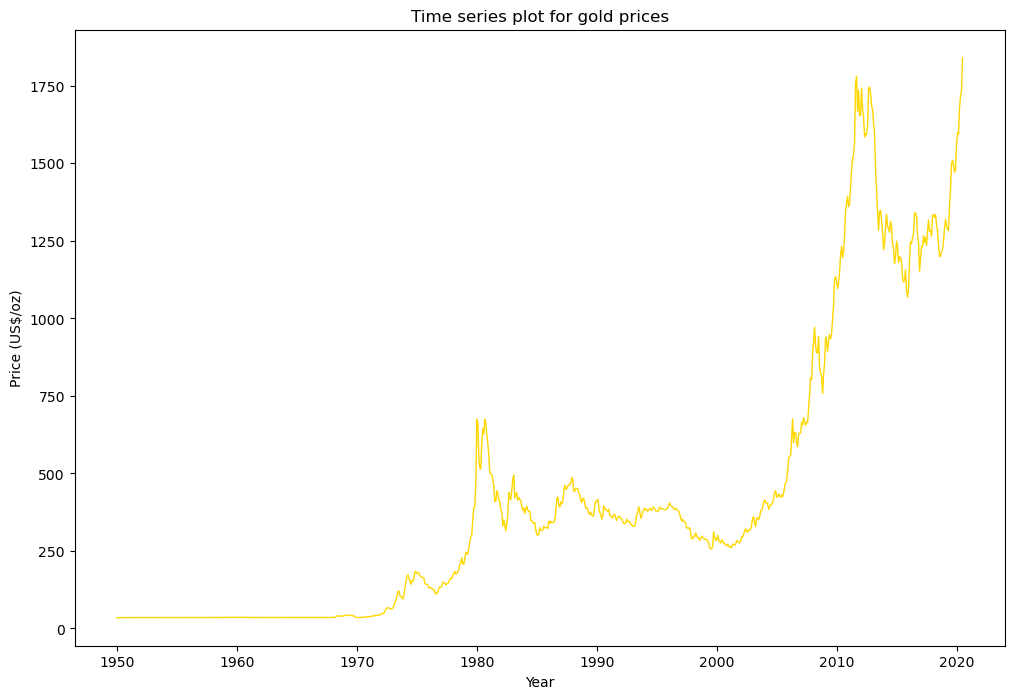

In [45]:
timeseries_plot("Price_Gold")

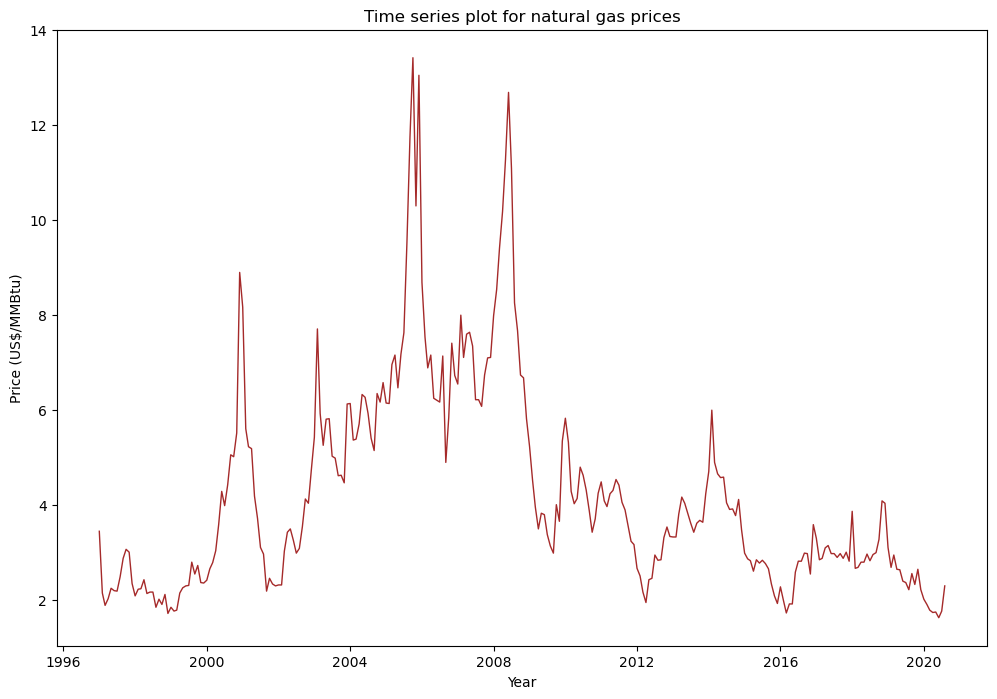

In [46]:
timeseries_plot("Price_NaturalGas")

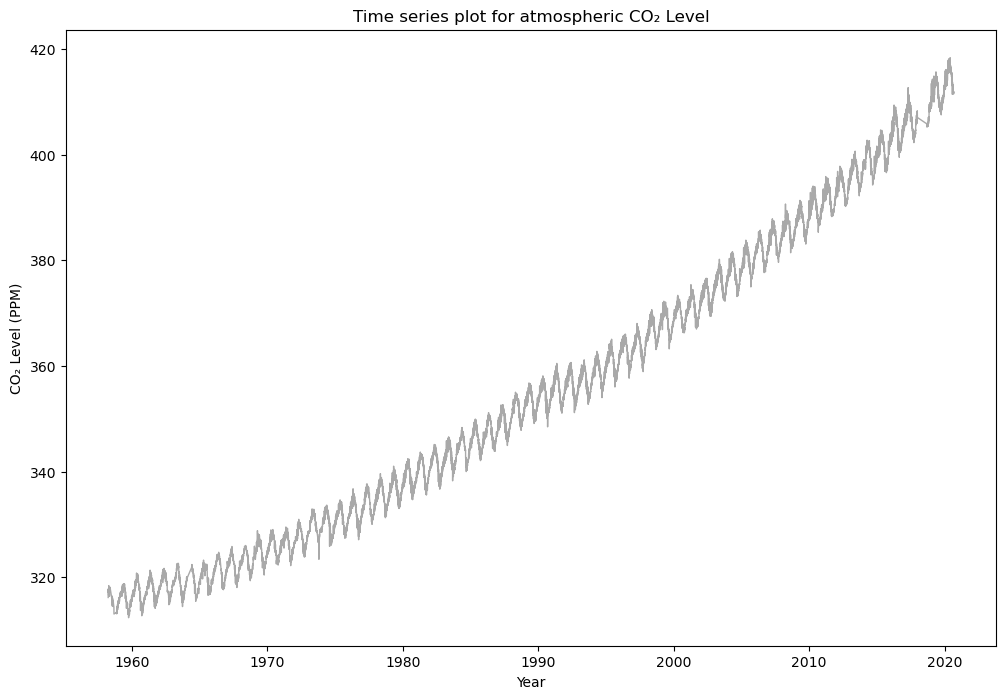

In [47]:
timeseries_plot("CO2_Level")

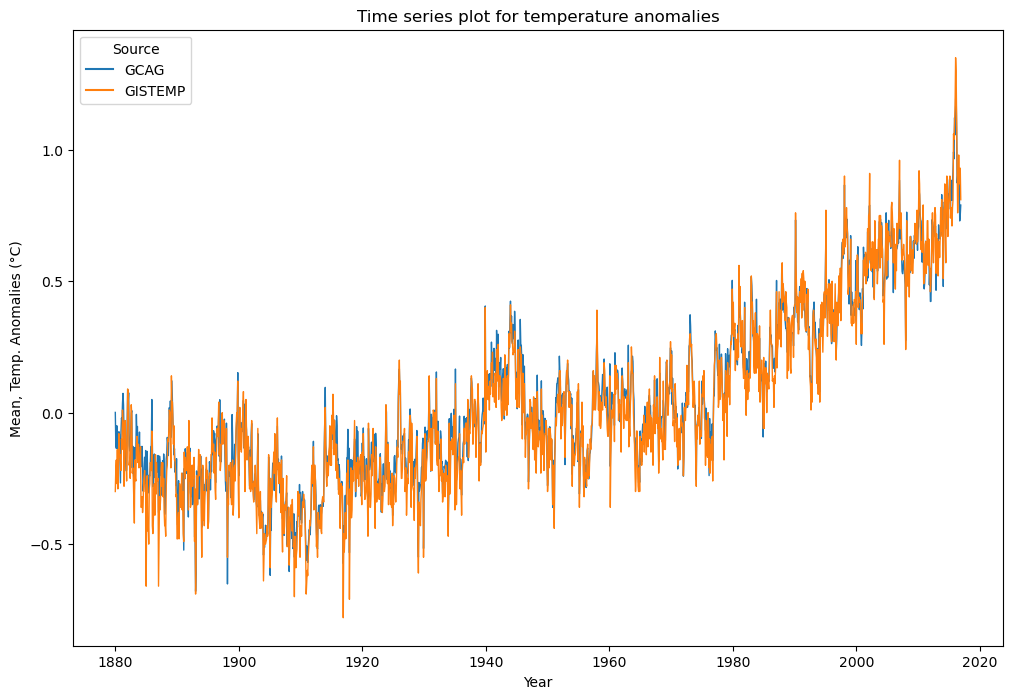

In [48]:
timeseries_plot("Mean_TempAnomalies")

[Back to Table of Contents](#T)

<a id="C7"></a>
### 7. Seaborn `heatmap`

<a id="C7_1"></a>
#### 7.1 Heatmap to show patterns of the data by year/month
Seaborn `heatmap` can also be utilized to illustrate the patterns (or trends) of the data according to year and month

In [49]:
# Pandas Pivot Table to show patterns
gold_freq = pd.pivot_table(price_gold, values="Price_Gold", index=price_gold["Date"].dt.year, columns=price_gold["Date"].dt.month)
ng_freq = pd.pivot_table(price_ng, values="Price_NaturalGas", index=price_ng["Date"].dt.year, columns=price_ng["Date"].dt.month)
co2_freq = pd.pivot_table(co2_level, values="CO2_Level", index=co2_level["Date"].dt.year, columns=co2_level["Date"].dt.month)
temp_freq = pd.pivot_table(temp_anom, values="Mean_TempAnomalies", index=temp_anom["Date"].dt.year, columns=temp_anom["Date"].dt.month)

In [50]:
# Function for plotting heatmap on the patters
def heatmap_freq(col):
    if col == "Price_Gold":
        plt.figure(figsize=(15,25))
        sns.heatmap(gold_freq, cmap="YlOrBr", cbar_kws={'label':"Price (US$/oz)"})
        plt.title("Heatmap on Prices of Gold over the years 1997 to 2020 by months", fontsize=15)
        plt.xlabel("Month", fontsize=12)
        plt.ylabel("Year", fontsize=12)
        
    elif col == "Price_NaturalGas":
        plt.figure(figsize=(15,10))
        sns.heatmap(ng_freq, cmap="viridis_r", cbar_kws={'label':"Price (US$/MMBtu)"})
        plt.title("Heatmap on Prices of Natural Gas over the years 1997 to 2020 by months", fontsize=15)
        plt.xlabel("Month", fontsize=12)
        plt.ylabel("Year", fontsize=12)
        
    elif col == "CO2_Level":
        plt.figure(figsize=(15,25))
        sns.heatmap(gold_freq, cmap="cividis", cbar_kws={'label':"CO\N{SUBSCRIPT TWO} Level (PPM)"})
        plt.title("Heatmap on Atmospheric CO\N{SUBSCRIPT TWO} level over the years 1997 to 2020 by months", fontsize=15)
        plt.xlabel("Month", fontsize=12)
        plt.ylabel("Year", fontsize=12)
        
    elif col == "Mean_TempAnomalies":
        plt.figure(figsize=(15,50))
        sns.heatmap(temp_freq, cmap="icefire", cbar_kws={'label':"Mean, Temp. Anomalies (\N{DEGREE SIGN}C)"})
        plt.title("Heatmap on Temperature Anomalies over the years 1880 to 2020 by months", fontsize=15)
        plt.xlabel("Month", fontsize=12)
        plt.ylabel("Year", fontsize=12)
        
    else:
        return("WRONG INPUT!!!")

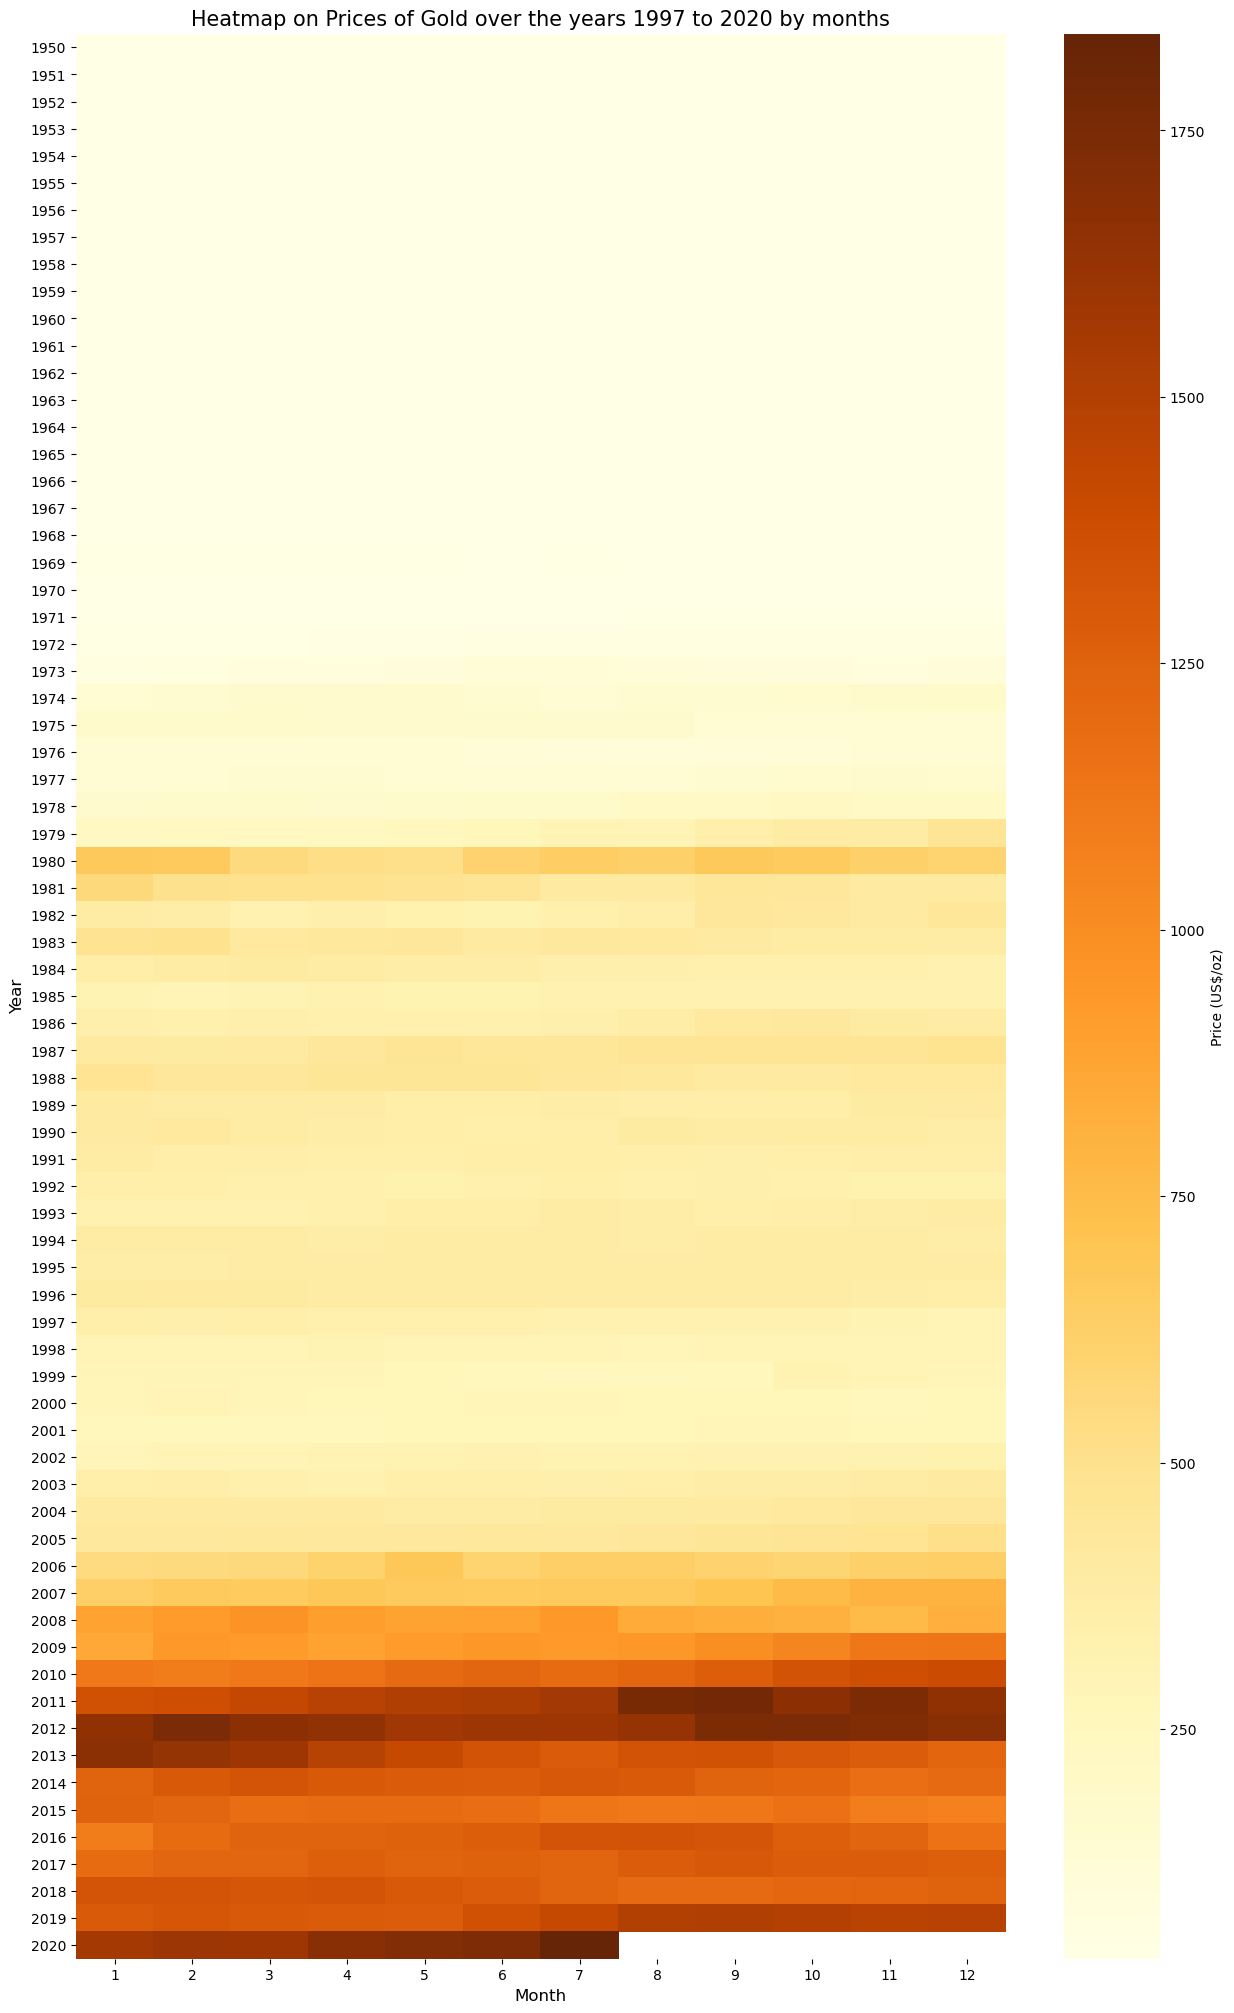

In [51]:
heatmap_freq("Price_Gold")

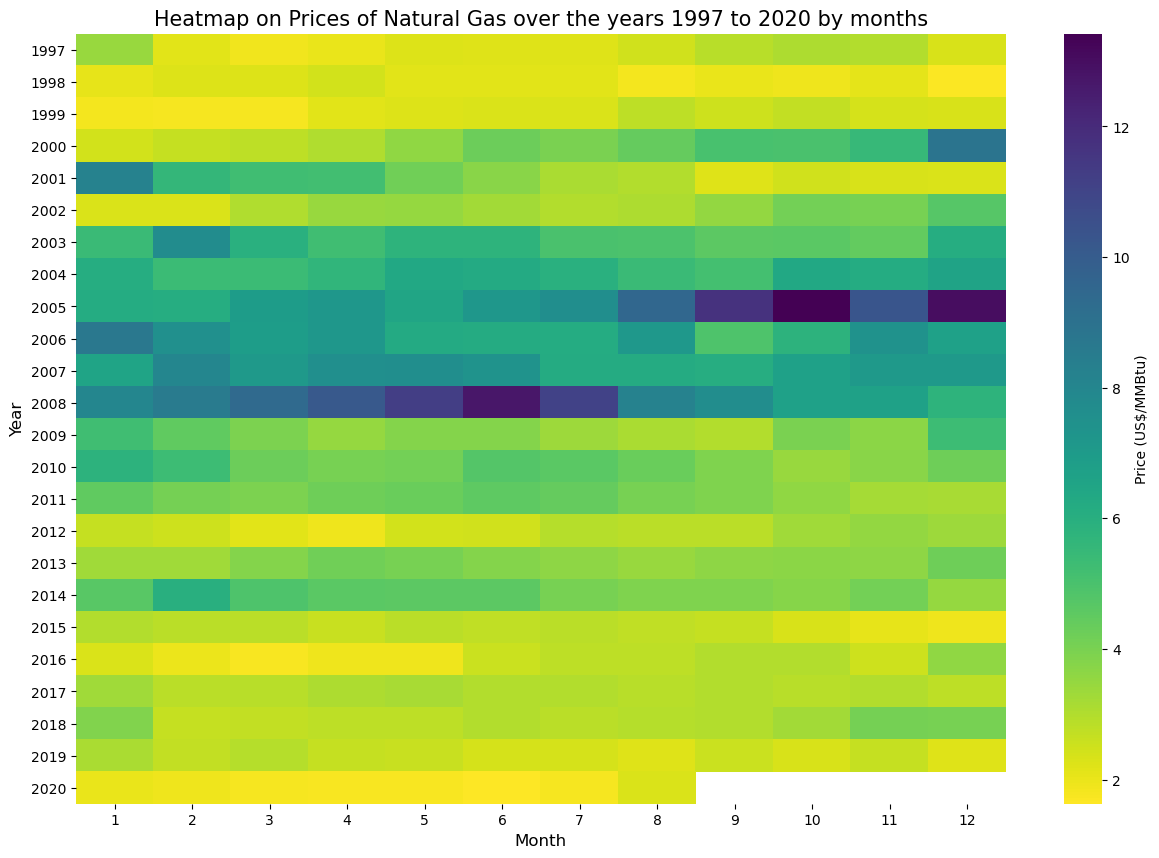

In [52]:
heatmap_freq("Price_NaturalGas")

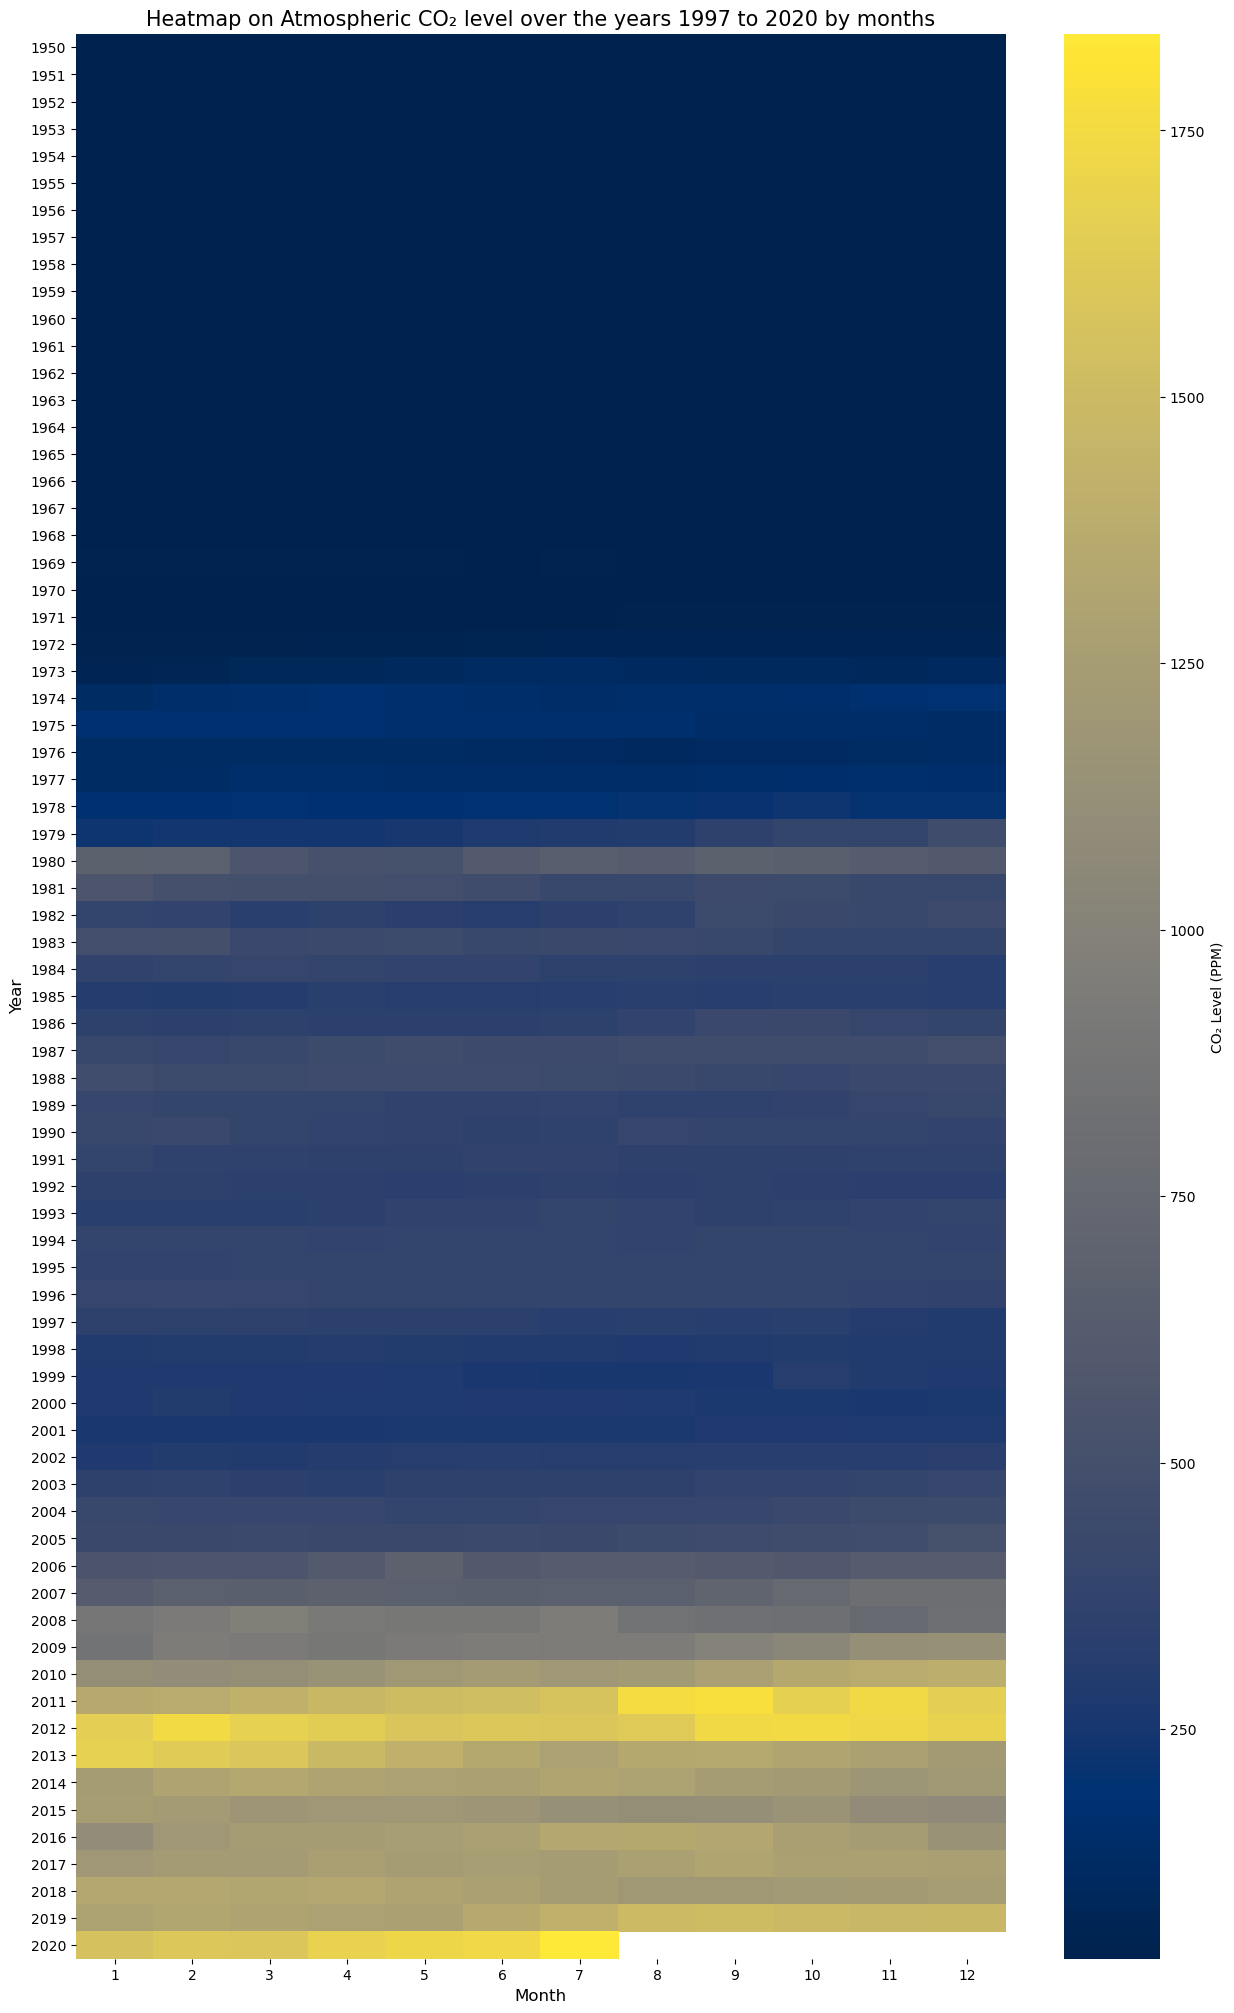

In [53]:
heatmap_freq("CO2_Level")

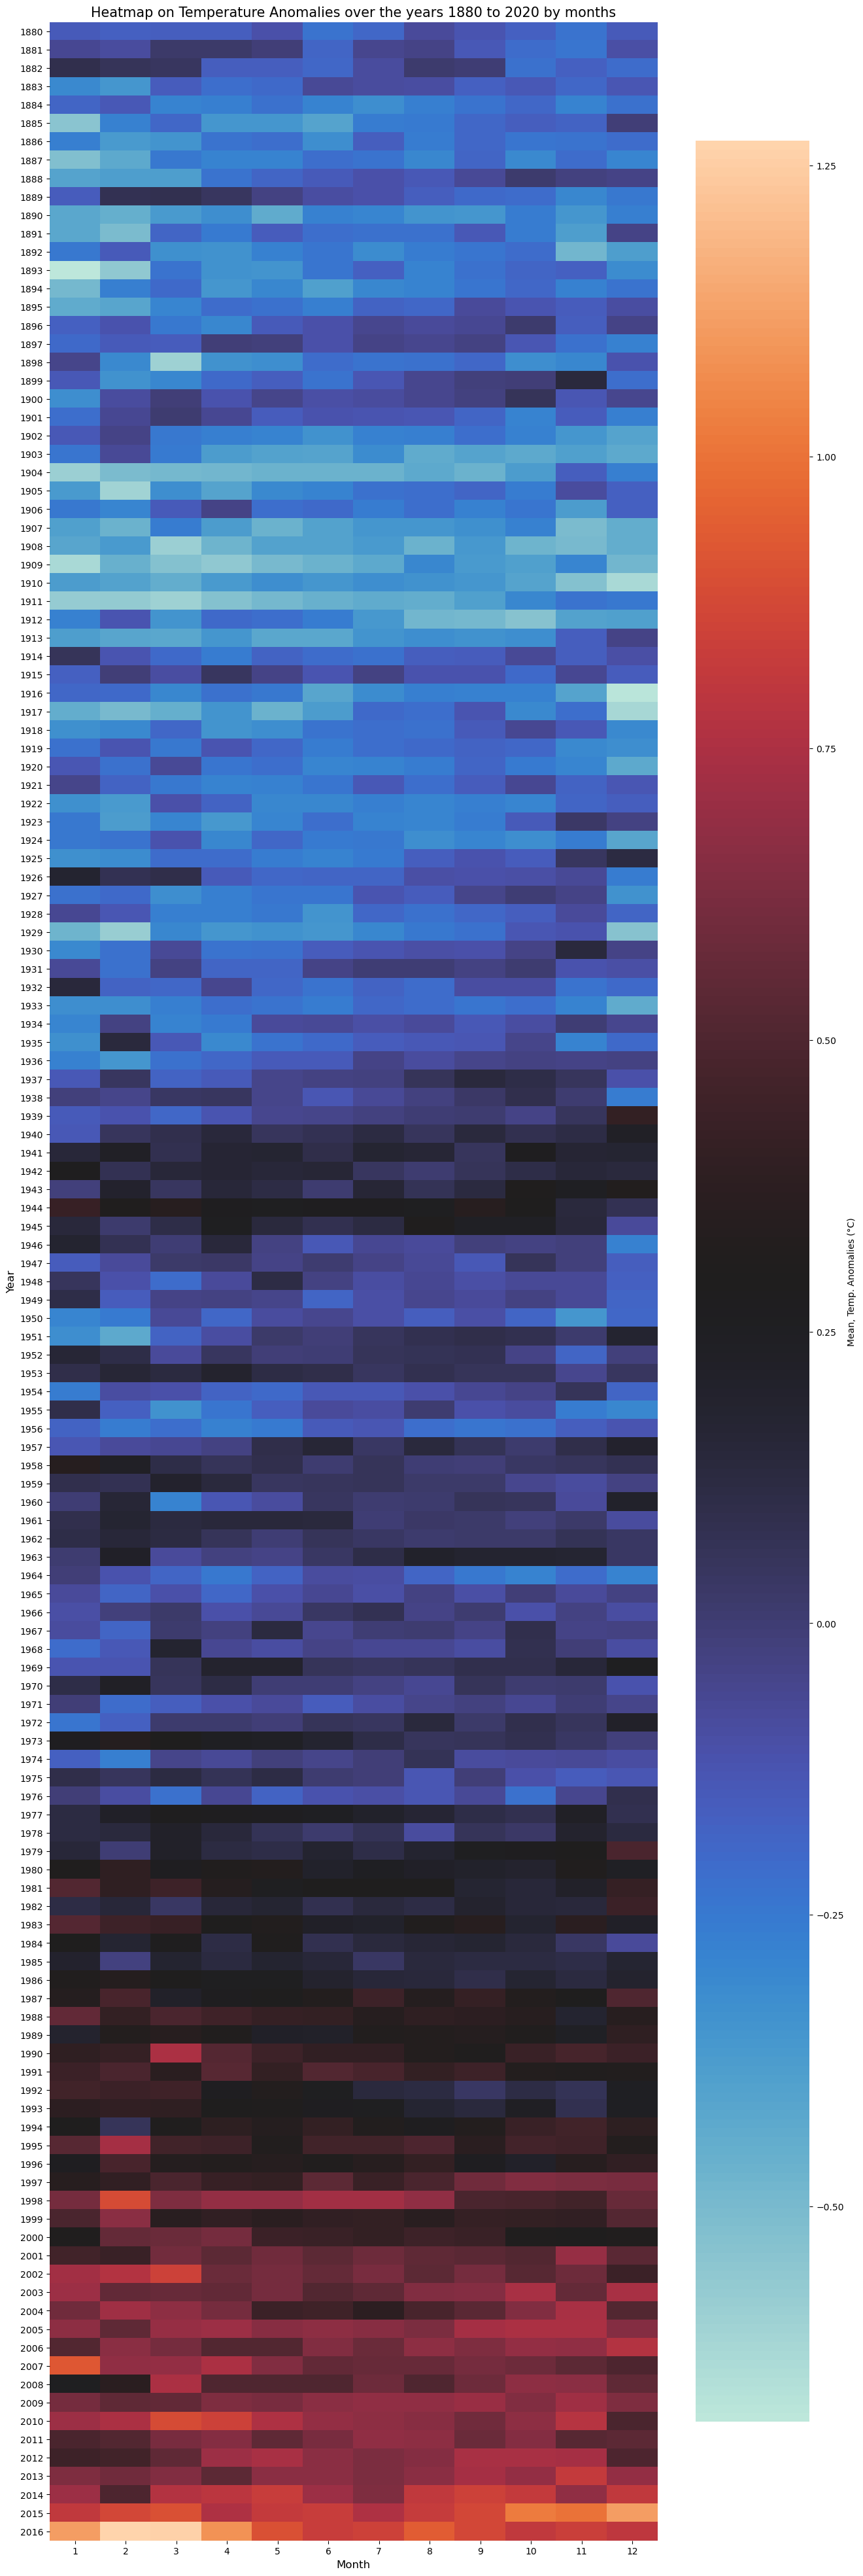

In [54]:
heatmap_freq("Mean_TempAnomalies")

<a id="C7_2"></a>
#### 7.2 Correlation Heatmap
Seaborn `heatmap` is primarily useful to highlight the correlation coefficients between each variables. Color maps defined through the `cmap` attribute in the `heatmap` plots helps to identify the degree of importance for these correlation coefficients.

In [55]:
correlations = combined_df.corr()
correlations

,Price_Gold,Price_NaturalGas,CO2_Level,Mean_TempAnomalies
Price_Gold,1.000000,-0.110108,0.869657,0.358359
Price_NaturalGas,-0.110108,1.000000,0.032665,-0.135874
CO2_Level,0.869657,0.032665,1.000000,0.537508
Mean_TempAnomalies,0.358359,-0.135874,0.537508,1.000000


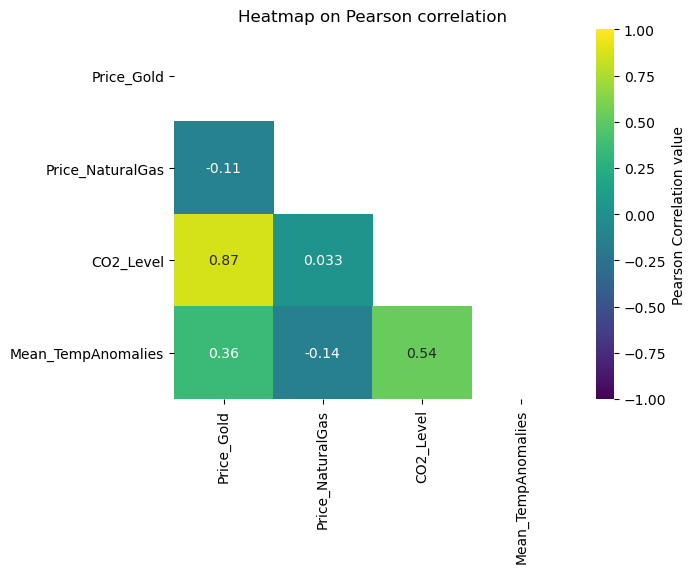

In [56]:
# Heatmap to visualize the correlation coefficients between variables
mask_corr = np.triu(np.ones_like(correlations, dtype=bool))

sns.heatmap(correlations, mask=mask_corr, cmap="viridis", vmin=1, vmax=-1, annot=True, cbar_kws={'label':"Pearson Correlation value"})
plt.title("Heatmap on Pearson correlation")
plt.show()

However, in data science and data analytics, an important note that <b>MUST</b> be considered is:

<b>"Correlation <u>does not imply</u> Causation"</b>

in which, those high values of correlation coefficients obtained <u>must be further validated</u> to prove its causality (or causation) <u>using suitable statistical tests</u>.

[Back to Table of Contents](#T)

<a id="C8"></a>
### 8. Displaying outliers using Seaborn `boxplot`

The easiest way to illustrate the outliers in the data can be done by plotting Seaborn `boxplot`. In the `boxplot` diagram, outliers are plotted with the <b>diamond dots</b> outside the boundary plots (of capital letter 'I').

In [57]:
# defining function to plot boxplot diagrams
def boxplot_outliers(col):
    if col == "Price_Gold":
        return(f"Boxplot is not suitable for {col}\nReason: Increasing trend is seen as the time progresses in the time series plot")
        
    elif col == "Price_NaturalGas":
        sns.boxplot(x=price_ng["Date"].dt.month, y=price_ng[col])
        plt.title("Boxplot on distributions of natural gas prices by Month")
        plt.xlabel("Month")
        
    elif col == "CO2_Level":
        return(f"Boxplot is not suitable for {col}\nReason: Increasing trend is seen as the time progresses in the time series plot")
        
    elif col == "Mean_TempAnomalies":
        #x=temp_anom["Date"].dt.month, 
        sns.boxplot(x=temp_anom["Source"], y=temp_anom[col])
        plt.title("Boxplot on distributions of temperature anomalies according to sources")
        plt.xlabel("Source")
        
    else:
        return("WRONG INPUT!!!")

In [58]:
boxplot_outliers("Price_Gold")

'Boxplot is not suitable for Price_Gold\nReason: Increasing trend is seen as the time progresses in the time series plot'

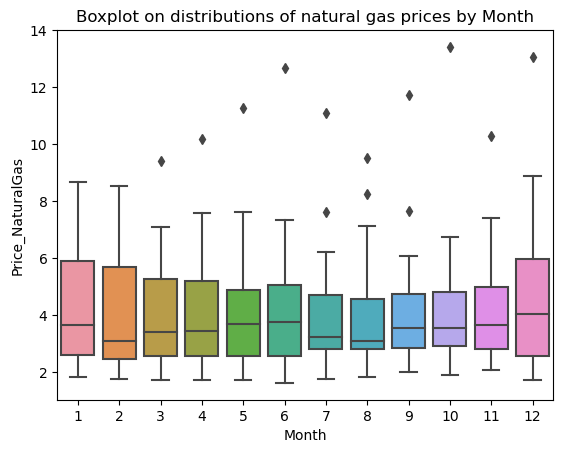

In [59]:
boxplot_outliers("Price_NaturalGas")

In [60]:
boxplot_outliers("CO2_Level")

'Boxplot is not suitable for CO2_Level\nReason: Increasing trend is seen as the time progresses in the time series plot'

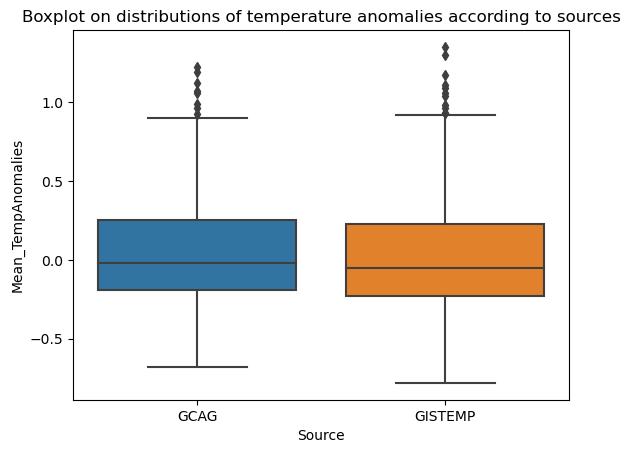

In [61]:
boxplot_outliers("Mean_TempAnomalies")

[Back to Table of Contents](#T)

<a id="C9"></a>
### 9. Enhanced time series plots - Horizontal lines of descriptive statistics

For these time series plots, the Seaborn `lineplot` is further enhanced with Matplotlib horizontal plots `plt.axhline` or `plt.plot` to show horizontal lines of several descriptive statistics e.g. Median line, Upper Fence and Lower Fence lines.

In [62]:
import math
from scipy.stats import iqr

In [63]:
# calculations on the descriptive statistics
mean_ng = price_ng["Price_NaturalGas"].mean()
median_ng = price_ng["Price_NaturalGas"].median()
sd_ng = price_ng["Price_NaturalGas"].apply(np.std)

q1_ng = price_ng["Price_NaturalGas"].quantile(q=.25)
q3_ng = price_ng["Price_NaturalGas"].quantile(q=.75)
iqr_ng = price_ng["Price_NaturalGas"].apply(iqr)

uf_ng = q3_ng + (1.5 * iqr_ng)
lf_ng = q1_ng - (1.5 * iqr_ng)

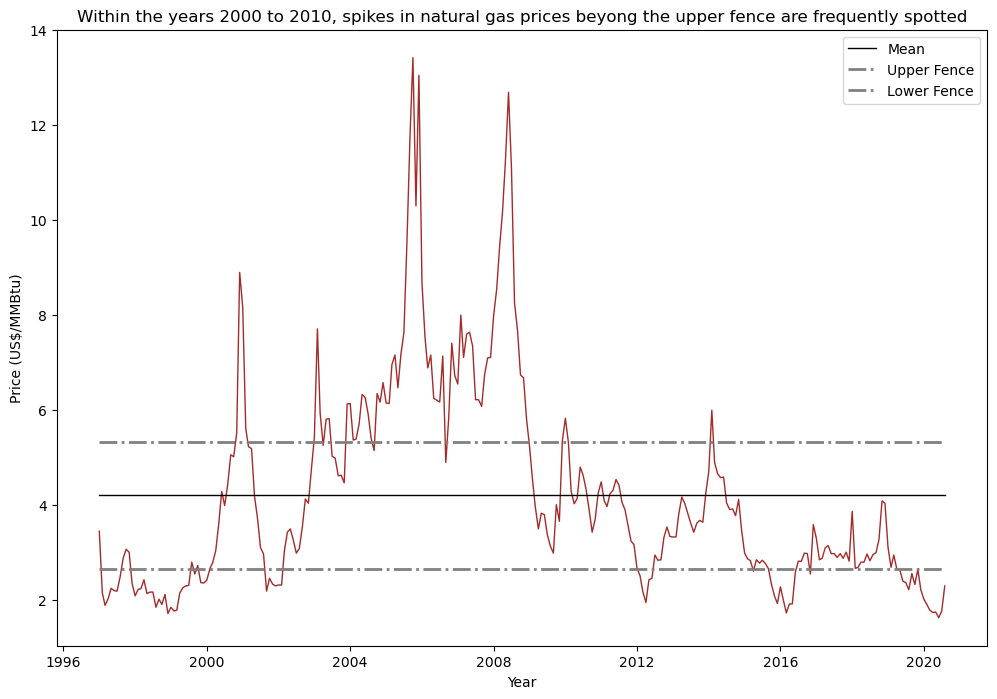

In [64]:
# Enhanced time series plot for Price_NaturalGas
plt.figure(figsize=(12,8))
sns.lineplot(x=price_ng["Date"], y=price_ng["Price_NaturalGas"], linewidth=1, color="brown", ci=None)
sns.lineplot(x=price_ng["Date"], y=mean_ng, linewidth=1, color="black", label="Mean")
plt.plot(price_ng["Date"], uf_ng, linewidth=2, linestyle="dashdot", color="grey", label="Upper Fence")
plt.plot(price_ng["Date"], lf_ng, linewidth=2, linestyle="dashdot", color="grey", label="Lower Fence")
plt.title("Within the years 2000 to 2010, spikes in natural gas prices beyong the upper fence are frequently spotted")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Price (US$/MMBtu)")
plt.show()

In [65]:
# calculations on the descriptive statistics
mean_temp = temp_anom.groupby(temp_anom["Source"])["Mean_TempAnomalies"].mean()
median_temp = temp_anom.groupby(temp_anom["Source"])["Mean_TempAnomalies"].median()
sd_temp = temp_anom.groupby(temp_anom["Source"])["Mean_TempAnomalies"].apply(np.std)

q1_temp = temp_anom.groupby(temp_anom["Source"])["Mean_TempAnomalies"].quantile(q=.25)
q3_temp = temp_anom.groupby(temp_anom["Source"])["Mean_TempAnomalies"].quantile(q=.75)
iqr_temp = temp_anom.groupby(temp_anom["Source"])["Mean_TempAnomalies"].apply(iqr)

uf_temp = q3_temp + (1.5 * iqr_temp)
lf_temp = q1_temp - (1.5 * iqr_temp)

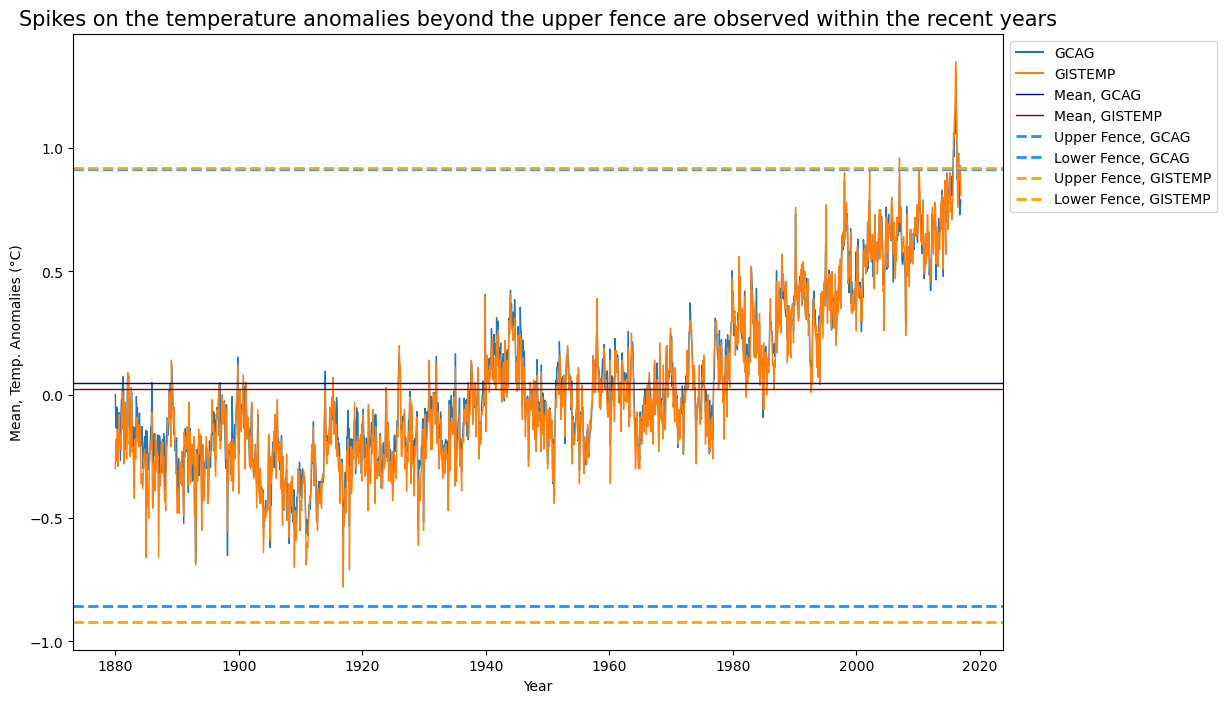

In [66]:
# Enhanced Time Series plot for Mean_TempAnomalies
plt.figure(figsize=(12,8))
sns.lineplot(x=temp_anom["Date"], y=temp_anom["Mean_TempAnomalies"], hue=temp_anom["Source"], linewidth=1, ci=None)
plt.axhline(y=mean_temp[0], linewidth=1, color="navy", label="Mean, GCAG")
plt.axhline(y=mean_temp[1], linewidth=1, color="darkred", label="Mean, GISTEMP")
plt.axhline(uf_temp[0], linewidth=2, linestyle="--", color="dodgerblue", label="Upper Fence, GCAG")
plt.axhline(lf_temp[0], linewidth=2, linestyle="--", color="dodgerblue", label="Lower Fence, GCAG")
plt.axhline(uf_temp[1], linewidth=2, linestyle="--", color="orange", label="Upper Fence, GISTEMP")
plt.axhline(lf_temp[1], linewidth=2, linestyle="--", color="orange", label="Lower Fence, GISTEMP")
plt.title("Spikes on the temperature anomalies beyond the upper fence are observed within the recent years", fontsize=15)
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel("Year")
plt.ylabel("Mean, Temp. Anomalies (\N{DEGREE SIGN}C)")
plt.show()

[Back to Table of Contents](#T)

<a id="C10"></a>
### 10. Decomposition of Time Series Plots
In Python machine learning, Decomposition of time series plots is an important visualization to show the trends and seasonality of the time series data.

Decomposition of time series plots is also considered as a part of Exploratory Data Analysis (EDA) where the time series plots are decomposed into four separated plots according to the following decomposition model formula:

1. "Additive" model: $y(t) = Level(t) + Trend(t) + Seasonal(t) + Noise(t)$
2. "Multiplicative" model: $y(t) = Level(t) \times Trend(t) \times Seasonal(t) \times Noise(t)$

In the decomposition plots:
- <b>Observed</b> plot is the $Level(t)$ that shows the observed plots of the data,
- <b>Trends</b> plot is the $Trend(t)$ that shows the trends of the data,
- <b>Seasonal</b> plot is the $Seasonal(t)$ that shows the seasonality of the data, and
- <b>Noise (Residuals)</b> plot is the $Noise(t)$ that shows the noises or residuals of the data

In [67]:
# importing seasonal_decompose function from statsmodels library to carry out the decomposition of time series plots
from statsmodels.tsa.seasonal import seasonal_decompose
gold_decomp = seasonal_decompose(price_gold["Price_Gold"], period=52, model='additive', extrapolate_trend='freq')
co2_decomp = seasonal_decompose(co2_level["CO2_Level"], period=520, model='additive', extrapolate_trend='freq')

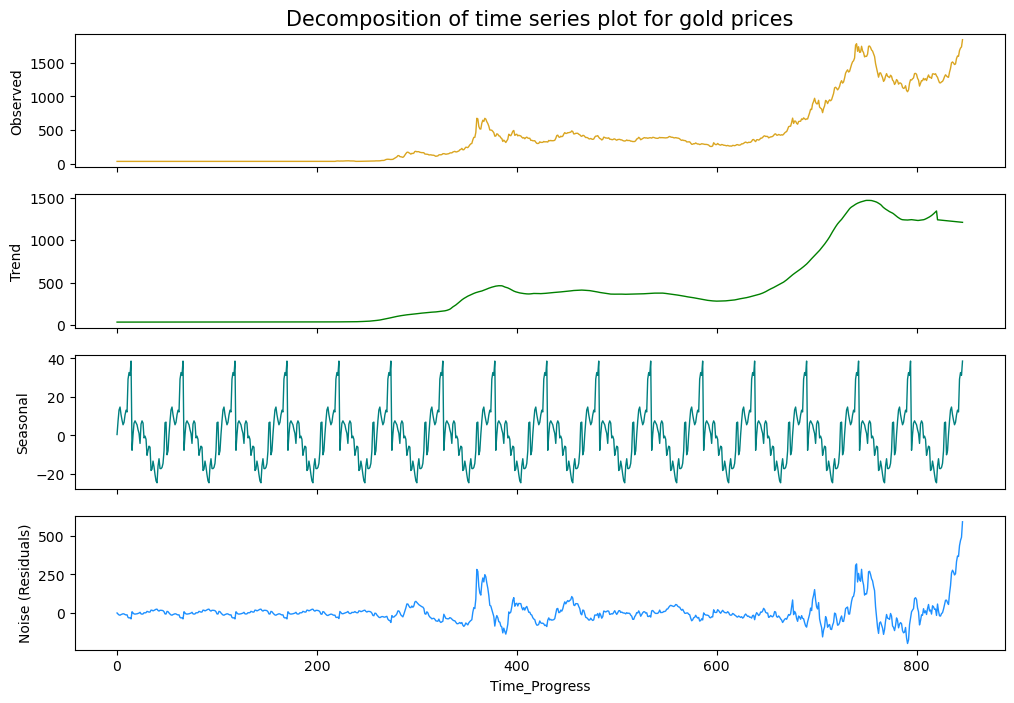

In [68]:
# plotting the decomposed Price_Gold time series
f1, ax1 = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(12,8))
    
ax1[0].set_title("Decomposition of time series plot for gold prices", fontsize=15)
gold_decomp.observed.plot(ax=ax1[0], legend=False, color="goldenrod", linewidth=1)
ax1[0].set_ylabel("Observed")

gold_decomp.trend.plot(ax=ax1[1], legend=False, color="green", linewidth=1)
ax1[1].set_ylabel("Trend")
    
gold_decomp.seasonal.plot(ax=ax1[2], legend=False, color="teal", linewidth=1)
ax1[2].set_ylabel("Seasonal")
    
gold_decomp.resid.plot(ax=ax1[3], legend=False, color="dodgerblue", linewidth=1)
ax1[3].set_ylabel("Noise (Residuals)")
    
for i in range(4):
    ax1[i]
    
plt.xticks()
ax1[3].set_xlabel("Time_Progress")
plt.show()

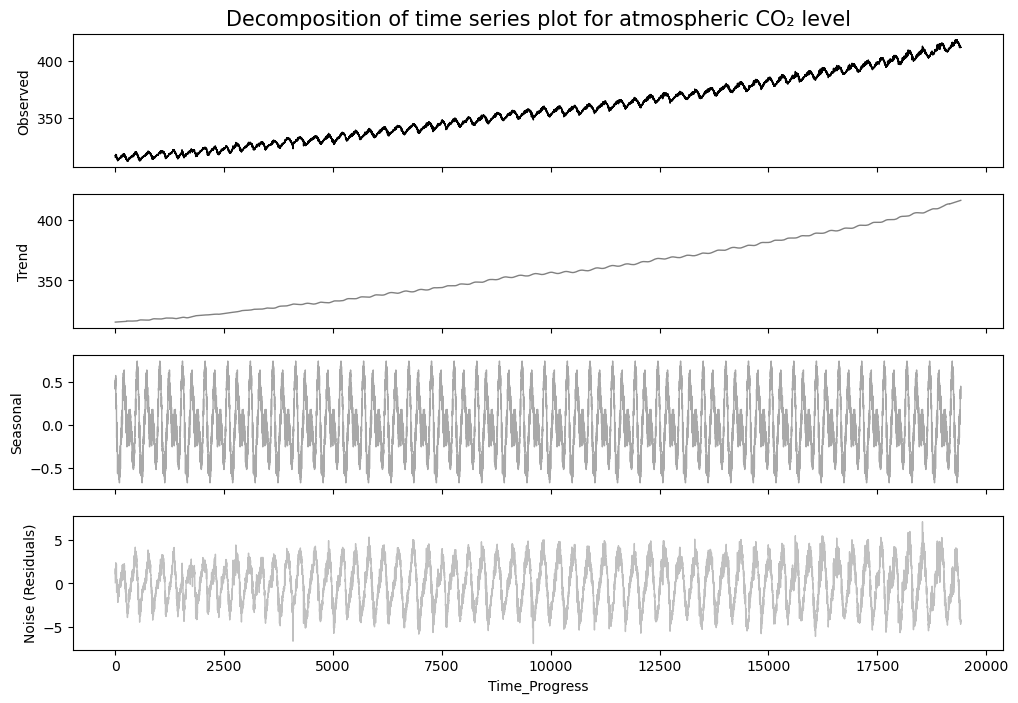

In [69]:
# plotting the decomposed CO2_Level time series
f2, ax2 = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(12,8))
    
ax2[0].set_title("Decomposition of time series plot for atmospheric CO\N{SUBSCRIPT TWO} level", fontsize=15)
co2_decomp.observed.plot(ax=ax2[0], legend=False, color="black", linewidth=1)
ax2[0].set_ylabel("Observed")

co2_decomp.trend.plot(ax=ax2[1], legend=False, color="grey", linewidth=1)
ax2[1].set_ylabel("Trend")
    
co2_decomp.seasonal.plot(ax=ax2[2], legend=False, color="darkgrey", linewidth=1)
ax2[2].set_ylabel("Seasonal")
    
co2_decomp.resid.plot(ax=ax2[3], legend=False, color="silver", linewidth=1)
ax2[3].set_ylabel("Noise (Residuals)")
    
for i in range(4):
    ax2[i]
    
plt.xticks()
ax2[3].set_xlabel("Time_Progress")
plt.show()

[Back to Table of Contents](#T)

## References
For further reading, I am recommending these resources which help me to create this Notebook:

- [Notebook entry <b>Data Visualization Analysis</b> by `@kshitijmohan` in Kaggle.com](https://www.kaggle.com/kshitijmohan/data-visualization-analysis)
- [Notebook entry <b>Basic of Statistical Viz : Plotly & Seaborn</b> by `@subinium` in Kaggle.com](https://www.kaggle.com/subinium/basic-of-statistical-viz-plotly-seaborn)
- [Notebook entry <b>Intro to Time Series Forecasting</b> by `@iamleonie` in Kaggle.com](https://www.kaggle.com/iamleonie/intro-to-time-series-forecasting)